# Sentiment Analysis using NLP Part 2 with the new dataset

Group 1

Keshav Yadav- 0770087

Ashish Kapadia - 0769157

Sri Sankeerth Koduru - 0768993

Dilpreet Singh - 0771612

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# Read the file
data = pd.read_csv('Tweets.csv')

In [ ]:
# Find the shape
data.shape

(14640, 15)

In [ ]:
# Have a quick look at the dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Perform Exploratory Analysis

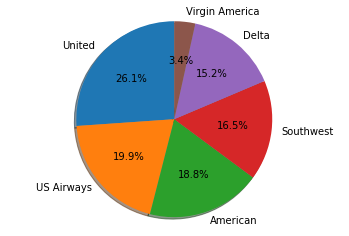

In [ ]:
# Create a pie chart by airline %
size = data['airline'].value_counts(normalize=True)*100
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=size.index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

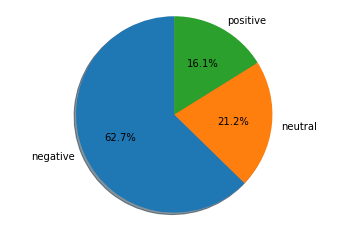

In [ ]:
# Create a pie chart by airline sentiment
size1 = data['airline_sentiment'].value_counts(normalize=True)*100
fig2, ax2 = plt.subplots()
ax2.pie(size1, labels=size1.index, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# Create a bar chart by airline and airline sentiment
category_order = ['negative','neutral','positive']
data1 = pd.pivot_table(data,index = 'airline',columns = 'airline_sentiment',values = 'tweet_id',aggfunc = 'count')
data1 = data1[category_order]
data1

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


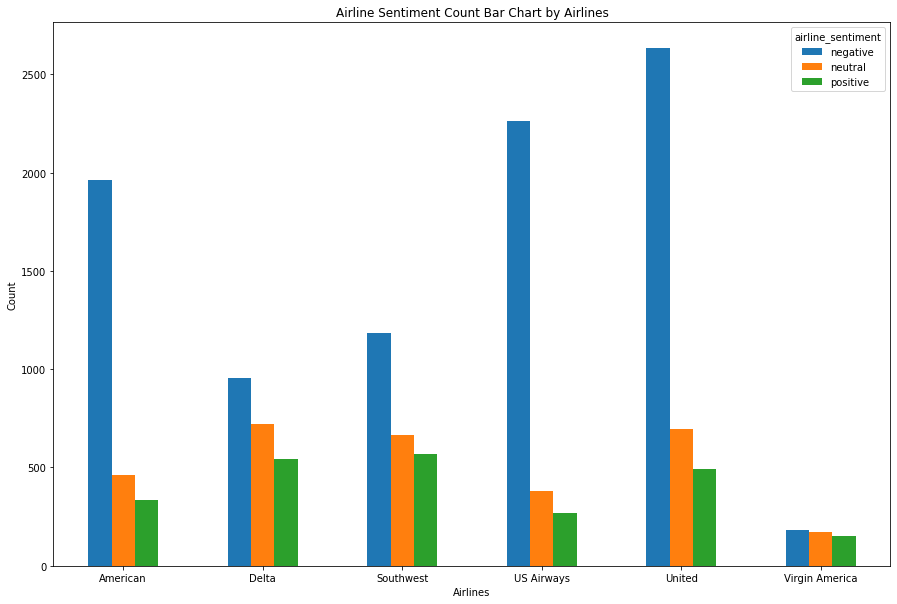

In [ ]:
# Creating the plot
plt1 = data1.plot.bar(rot=0, figsize=(15,10))
plt.title('Airline Sentiment Count Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
plt.show()

In [ ]:
# Pivot Table for airline sentiment and airline sentiment confidence
data2 = pd.pivot_table(data,index = 'airline_sentiment',values = 'airline_sentiment_confidence',aggfunc = 'mean')
data2

,airline_sentiment_confidence
airline_sentiment,
negative,0.933365
neutral,0.823303
positive,0.872039


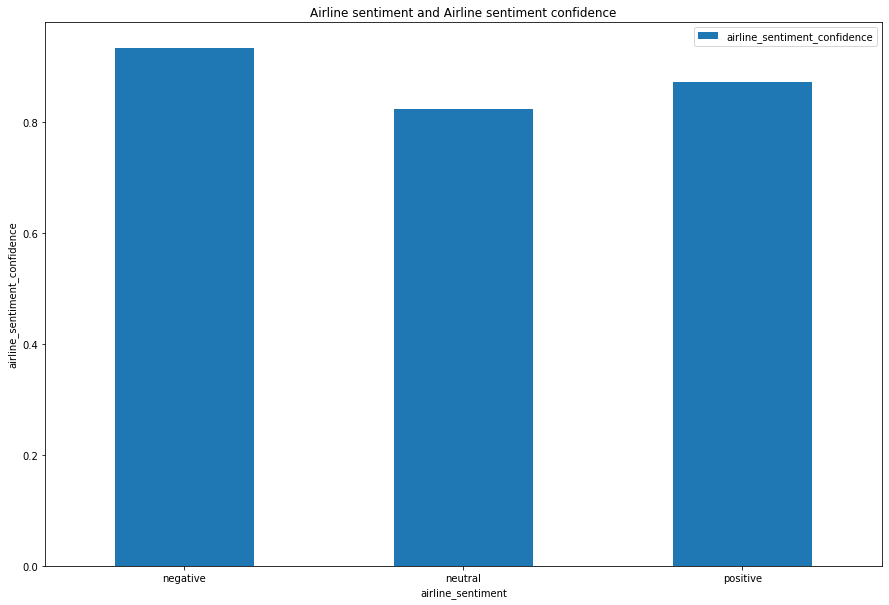

In [ ]:
# Create a bar plot for airline sentiment and airline sentiment confidence
plt2 = data2.plot.bar(rot=0, figsize=(15,10))
plt.title('Airline sentiment and Airline sentiment confidence')
plt.xlabel('airline_sentiment')
plt.ylabel('airline_sentiment_confidence')
plt.show()

In [ ]:
# Create a new dataframe that will only have 2 relevant columns
# Identify the 2 columns
# For airline_sentiment I only want to see positive and negative sentiments
# Remove the neutral sentiments from the dataframe

data_clean = data[['text','airline_sentiment']]
data_clean = data_clean.set_index("airline_sentiment")
data_clean = data_clean.drop("neutral")
data_clean.reset_index(inplace=True)
data_clean = data_clean[['text','airline_sentiment']]

In [ ]:
#Your final dataframe should look like this
data_clean

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica it's really aggressive to blast...,negative
2,@VirginAmerica and it's a really big bad thing...,negative
3,@VirginAmerica seriously would pay $30 a fligh...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive
...,...,...
11536,@AmericanAir my flight was Cancelled Flightled...,negative
11537,@AmericanAir right on cue with the delays👌,negative
11538,@AmericanAir thank you we got on a different f...,positive
11539,@AmericanAir leaving over 20 minutes Late Flig...,negative


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Use this to create the corpus. Use the same steps from the last lab

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

corpus = [] # Build a new list for all the words from all the texts
# corpus is a collection of text and a common term used in NLP
for i in range (0, 11541):
    text = re.sub('[^a-zA-Z]', ' ', data_clean['text'][i] )
    text = text.lower()
    text = text.split()
    ps =PorterStemmer()
    text = [ps.stem(word) for word in text if not  word in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [ ]:
# Print Corpus
corpus

['virginamerica plu ad commerci experi tacki',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica lt pretti graphic much better minim iconographi',
 'virginamerica great deal alreadi think nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia fli fabul seduct sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 'virginamerica flew nyc sfo last week fulli sit seat due two larg gentleman either side help',
 'fli virginamerica',
 'virginamerica know would amazingli awesom bo fll pleas want fli',
 'virginam

### Create bag of words model

In [ ]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)

In [ ]:
X = cv.fit_transform(corpus).toarray()# independent variables
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(cv.get_feature_names())

['aa', 'abc', 'abl', 'absolut', 'absurd', 'accept', 'access', 'accommod', 'accord', 'account', 'acct', 'accur', 'acknowledg', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'admir', 'advanc', 'advantag', 'advertis', 'advis', 'advisori', 'affect', 'afford', 'afternoon', 'age', 'agent', 'ago', 'ah', 'ahead', 'air', 'airbu', 'aircraft', 'airlin', 'airplan', 'airport', 'airway', 'alert', 'allianc', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although', 'alway', 'amaz', 'america', 'american', 'americanair', 'americanairlin', 'amount', 'amp', 'angri', 'announc', 'annoy', 'anoth', 'answer', 'anymor', 'anyon', 'anyth', 'anyway', 'anywher', 'apart', 'apolog', 'app', 'appar', 'appear', 'appli', 'appreci', 'approv', 'area', 'argu', 'around', 'arriv', 'asap', 'asham', 'ask', 'ass', 'assign', 'assist', 'assum', 'assur', 'atl', 'atlanta', 'attempt', 'attend', 'attent', 'attitud', 'au', 'austin', 'auto', 'autom', 'automat', 'avail', 'avoid', 'aw',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X.shape

(11541, 1500)

In [ ]:
y = data_clean.iloc[:, 1].values # dependent variable (These are your Liked values from the dataset)
y

array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

### Apply Various Machine Learning Classification Models (all 5)
### Create Confusion matrix and all the four performance metrics

In [ ]:
# Naive Bayes Model
# Splitting the dataset into the Training set and Test set
x_train_NB,x_test_NB,y_train_NB,y_test_NB = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_NB,y_train_NB)

# Predicting the Test set results
naive_bayes_predict = naive_bayes.predict(x_test_NB)

# Make the Confusion Matrix
confusion_matrix_NB = confusion_matrix(y_test_NB,naive_bayes_predict)
print(confusion_matrix_NB)

# Evaluate the results
print('Accuracy Score of Naive Bayes Model is:',accuracy_score(y_test_NB,naive_bayes_predict))
print('Precision Score of Naive Bayes Model is:',precision_score(y_test_NB,naive_bayes_predict, average='micro'))
print('Recall Score of Naive Bayes Model is:',recall_score(y_test_NB,naive_bayes_predict,average='micro'))
print('F1 Score of Naive Bayes Model is:',f1_score(y_test_NB,naive_bayes_predict,average='micro'))

[[ 806 1037]
 [  52  414]]
Accuracy Score of Naive Bayes Model is: 0.5283672585534863
Precision Score of Naive Bayes Model is: 0.5283672585534863
Recall Score of Naive Bayes Model is: 0.5283672585534863
F1 Score of Naive Bayes Model is: 0.5283672585534863


In [ ]:
# KNN Model
# Splitting the dataset into the Training set and Test set
x_train_KNN,x_test_KNN,y_train_KNN,y_test_KNN = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
KNN_Model = KNeighborsClassifier(n_neighbors=3)
KNN_Model.fit(x_train_KNN, y_train_KNN)

# Predicting the Test set results
KNN_predict = KNN_Model.predict(x_test_KNN)

# Make the Confusion Matrix
confusion_matrix_KNN = confusion_matrix(y_test_KNN,KNN_predict)
print(confusion_matrix_KNN)

# Evaluate the results
print('Accuracy Score of KNN Model is:',accuracy_score(y_test_KNN,KNN_predict))
print('Precision Score of KNN Model is:',precision_score(y_test_KNN,KNN_predict,average='micro'))
print('Recall Score of KNN Model is:',recall_score(y_test_KNN,KNN_predict,average='micro'))
print('F1 Score of KNN Model is:',f1_score(y_test_KNN,KNN_predict,average='micro'))

[[1537  306]
 [ 139  327]]
Accuracy Score of KNN Model is: 0.8072758770030316
Precision Score of KNN Model is: 0.8072758770030316
Recall Score of KNN Model is: 0.8072758770030316
F1 Score of KNN Model is: 0.8072758770030316


In [ ]:
# Support Vector Machine SVM Model
# Splitting the dataset into the Training set and Test set
x_train_SVM,x_test_SVM,y_train_SVM,y_test_SVM = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
Support_Vector_Machine = SVC(kernel='linear', random_state=411)
Support_Vector_Machine.fit(x_train_SVM, y_train_SVM)

# Predicting the Test set results
Support_Vector_Machine_predict = Support_Vector_Machine.predict(x_test_SVM)

# Make the Confusion Matrix
confusion_matrix_SVM = confusion_matrix(y_test_SVM,Support_Vector_Machine_predict)
print(confusion_matrix_SVM)

# Evaluate the results
print('Accuracy Score of Support Vector Machine Model is:',accuracy_score(y_test_SVM,Support_Vector_Machine_predict))
print('Precision Score of Support Vector Machine Model is:',precision_score(y_test_SVM,Support_Vector_Machine_predict,average='micro'))
print('Recall Score of Support Vector Machine Model is:',recall_score(y_test_SVM,Support_Vector_Machine_predict,average='micro'))
print('F1 Score of Support Vector Machine Model is:',f1_score(y_test_SVM,Support_Vector_Machine_predict,average='micro'))

[[1756   87]
 [ 124  342]]
Accuracy Score of Support Vector Machine Model is: 0.9086184495452577
Precision Score of Support Vector Machine Model is: 0.9086184495452577
Recall Score of Support Vector Machine Model is: 0.9086184495452577
F1 Score of Support Vector Machine Model is: 0.9086184495452577


In [ ]:
#Decision Tree Classification Model
# Splitting the dataset into the Training set and Test set
x_train_DTC,x_test_DTC,y_train_DTC,y_test_DTC = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
Decision_Tree_Classification = DecisionTreeClassifier()
Decision_Tree_Classification.fit(x_train_DTC, y_train_DTC)

# Predicting the Test set results
Decision_Tree_Classification_Predict = Decision_Tree_Classification.predict(x_test_DTC)

# Make the Confusion Matrix
confusion_matrix_DTC = confusion_matrix(y_test_DTC,Decision_Tree_Classification_Predict)
print(confusion_matrix_DTC)

# Evaluate the results
print('Accuracy Score of Decision Tree Classification Model is:',accuracy_score(y_test_DTC,Decision_Tree_Classification_Predict))
print('Precision Score of Decision Tree Classification Model is:',precision_score(y_test_DTC,Decision_Tree_Classification_Predict,average='micro'))
print('Recall Score of Decision Tree Classification Model is:',recall_score(y_test_DTC,Decision_Tree_Classification_Predict,average='micro'))
print('F1 Score of Decision Tree Classification Model is:',f1_score(y_test_DTC,Decision_Tree_Classification_Predict,average='micro'))

[[1651  192]
 [ 145  321]]
Accuracy Score of Decision Tree Classification Model is: 0.8540493720225206
Precision Score of Decision Tree Classification Model is: 0.8540493720225206
Recall Score of Decision Tree Classification Model is: 0.8540493720225206
F1 Score of Decision Tree Classification Model is: 0.8540493720225206


In [ ]:
#Random Forest Regression
# Splitting the dataset into the Training set and Test set
x_train_RF,x_test_RF,y_train_RF,y_test_RF = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
Random_Forest = RandomForestClassifier(n_estimators=100)
Random_Forest.fit(x_train_RF, y_train_RF)

# Predicting the Test set results
Rndom_Forest_predict = Random_Forest.predict(x_test_RF)

# Make the Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test_RF,Rndom_Forest_predict)
print(confusion_matrix_RF)

# Evaluate the results
print('Accuracy Score of Ranadom Forest Model is:',accuracy_score(y_test_RF,Rndom_Forest_predict))
print('Precision Score of Ranadom Forest Model is:',precision_score(y_test_RF,Rndom_Forest_predict,average='micro'))
print('Recall Score of Ranadom Forest Model is:',recall_score(y_test_RF,Rndom_Forest_predict,average='micro'))
print('F1 Score of Ranadom Forest Model is:',f1_score(y_test_RF,Rndom_Forest_predict,average='micro'))

[[1741  102]
 [ 144  322]]
Accuracy Score of Ranadom Forest Model is: 0.8934603724556085
Precision Score of Ranadom Forest Model is: 0.8934603724556085
Recall Score of Ranadom Forest Model is: 0.8934603724556085
F1 Score of Ranadom Forest Model is: 0.8934603724556085


### Create a TF-IDF model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [ ]:
corpus = vectorizer.fit_transform(corpus).toarray()

In [ ]:
X =corpus

In [ ]:
X.shape

(11541, 1589)

### Apply the Machine learning models onto this TF-IDF model (all 5)
### Create Confusion matrix and all the four performance metrics

In [ ]:
# Naive Bayes Model
# Splitting the dataset into the Training set and Test set
x_train_NB,x_test_NB,y_train_NB,y_test_NB = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
naive_bayes = GaussianNB()
naive_bayes.fit(x_train_NB,y_train_NB)

# Predicting the Test set results
naive_bayes_predict = naive_bayes.predict(x_test_NB)

# Make the Confusion Matrix
confusion_matrix_NB = confusion_matrix(y_test_NB,naive_bayes_predict)
print(confusion_matrix_NB)

# Evaluate the results
print('Accuracy Score of Naive Bayes Model is:',accuracy_score(y_test_NB,naive_bayes_predict))
print('Precision Score of Naive Bayes Model is:',precision_score(y_test_NB,naive_bayes_predict,average='micro'))
print('Recall Score of Naive Bayes Model is:',recall_score(y_test_NB,naive_bayes_predict,average='micro'))
print('F1 Score of Naive Bayes Model is:',f1_score(y_test_NB,naive_bayes_predict,average='micro'))

[[ 843 1000]
 [  60  406]]
Accuracy Score of Naive Bayes Model is: 0.5409268081420529
Precision Score of Naive Bayes Model is: 0.5409268081420529
Recall Score of Naive Bayes Model is: 0.5409268081420529
F1 Score of Naive Bayes Model is: 0.5409268081420529


In [ ]:
# KNN Model
# Splitting the dataset into the Training set and Test set
x_train_KNN,x_test_KNN,y_train_KNN,y_test_KNN = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
KNN_Model = KNeighborsClassifier(n_neighbors=3)
KNN_Model.fit(x_train_KNN, y_train_KNN)

# Predicting the Test set results
KNN_predict = KNN_Model.predict(x_test_KNN)

# Make the Confusion Matrix
confusion_matrix_KNN = confusion_matrix(y_test_KNN,KNN_predict)
print(confusion_matrix_KNN)

# Evaluate the results
print('Accuracy Score of KNN Model is:',accuracy_score(y_test_KNN,KNN_predict))
print('Precision Score of KNN Model is:',precision_score(y_test_KNN,KNN_predict,average='micro'))
print('Recall Score of KNN Model is:',recall_score(y_test_KNN,KNN_predict,average='micro'))
print('F1 Score of KNN Model is:',f1_score(y_test_KNN,KNN_predict,average='micro'))

[[1677  166]
 [ 132  334]]
Accuracy Score of KNN Model is: 0.8709398007795582
Precision Score of KNN Model is: 0.8709398007795582
Recall Score of KNN Model is: 0.8709398007795582
F1 Score of KNN Model is: 0.8709398007795582


In [ ]:
# Support Vector Machine SVM Model
# Splitting the dataset into the Training set and Test set
x_train_SVM,x_test_SVM,y_train_SVM,y_test_SVM = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
Support_Vector_Machine = SVC(kernel='linear', random_state=411)
Support_Vector_Machine.fit(x_train_SVM, y_train_SVM)

# Predicting the Test set results
Support_Vector_Machine_predict = Support_Vector_Machine.predict(x_test_SVM)

# Make the Confusion Matrix
confusion_matrix_SVM = confusion_matrix(y_test_SVM,Support_Vector_Machine_predict)
print(confusion_matrix_SVM)

# Evaluate the results
print('Accuracy Score of Support Vector Machine Model is:',accuracy_score(y_test_SVM,Support_Vector_Machine_predict))
print('Precision Score of Support Vector Machine Model is:',precision_score(y_test_SVM,Support_Vector_Machine_predict,average='micro'))
print('Recall Score of Support Vector Machine Model is:',recall_score(y_test_SVM,Support_Vector_Machine_predict,average='micro'))
print('F1 Score of Support Vector Machine Model is:',f1_score(y_test_SVM,Support_Vector_Machine_predict,average='micro'))

[[1790   53]
 [ 142  324]]
Accuracy Score of Support Vector Machine Model is: 0.9155478562148116
Precision Score of Support Vector Machine Model is: 0.9155478562148116
Recall Score of Support Vector Machine Model is: 0.9155478562148116
F1 Score of Support Vector Machine Model is: 0.9155478562148116


In [ ]:
#Decision Tree Classification Model
# Splitting the dataset into the Training set and Test set
x_train_DTC,x_test_DTC,y_train_DTC,y_test_DTC = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
Decision_Tree_Classification = DecisionTreeClassifier()
Decision_Tree_Classification.fit(x_train_DTC, y_train_DTC)

# Predicting the Test set results
Decision_Tree_Classification_Predict = Decision_Tree_Classification.predict(x_test_DTC)

# Make the Confusion Matrix
confusion_matrix_DTC = confusion_matrix(y_test_DTC,Decision_Tree_Classification_Predict)
print(confusion_matrix_DTC)

# Evaluate the results
print('Accuracy Score of Decision Tree Classification Model is:',accuracy_score(y_test_DTC,Decision_Tree_Classification_Predict))
print('Precision Score of Decision Tree Classification Model is:',precision_score(y_test_DTC,Decision_Tree_Classification_Predict,average='micro'))
print('Recall Score of Decision Tree Classification Model is:',recall_score(y_test_DTC,Decision_Tree_Classification_Predict,average='micro'))
print('F1 Score of Decision Tree Classification Model is:',f1_score(y_test_DTC,Decision_Tree_Classification_Predict,average='micro'))

[[1669  174]
 [ 179  287]]
Accuracy Score of Decision Tree Classification Model is: 0.8471199653529666
Precision Score of Decision Tree Classification Model is: 0.8471199653529666
Recall Score of Decision Tree Classification Model is: 0.8471199653529666
F1 Score of Decision Tree Classification Model is: 0.8471199653529666


In [ ]:
#Random Forest Regression
# Splitting the dataset into the Training set and Test set
x_train_RF,x_test_RF,y_train_RF,y_test_RF = train_test_split(X,y,test_size = 0.2,random_state = 411)

# Fitting classifier to the Training set
Random_Forest = RandomForestClassifier(n_estimators=100)
Random_Forest.fit(x_train_RF, y_train_RF)

# Predicting the Test set results
Rndom_Forest_predict = Random_Forest.predict(x_test_RF)

# Make the Confusion Matrix
confusion_matrix_RF = confusion_matrix(y_test_RF,Rndom_Forest_predict)
print(confusion_matrix_RF)

# Evaluate the results
print('Accuracy Score of Ranadom Forest Model is:',accuracy_score(y_test_RF,Rndom_Forest_predict))
print('Precision Score of Ranadom Forest Model is:',precision_score(y_test_RF,Rndom_Forest_predict,average='micro'))
print('Recall Score of Ranadom Forest Model is:',recall_score(y_test_RF,Rndom_Forest_predict,average='micro'))
print('F1 Score of Ranadom Forest Model is:',f1_score(y_test_RF,Rndom_Forest_predict,average='micro'))

[[1776   67]
 [ 171  295]]
Accuracy Score of Ranadom Forest Model is: 0.8969250757903855
Precision Score of Ranadom Forest Model is: 0.8969250757903855
Recall Score of Ranadom Forest Model is: 0.8969250757903855
F1 Score of Ranadom Forest Model is: 0.8969250757903855


### Compare the various models on both the approaches.

| Model | Accuracy_score | TF-IDF_Accuracy_score |
| --- | --- | --- |
| Naïve Bayes Model	 | 52.8% | 54.1% |
| K-Nearest Neighbors (KNN)		 | 80.7% | 87.1% |
| Support Vector Machine (SVM)		 | 90.8% | 91.6% |
| Decision Trees	 | 85.5% | 85.2% |
| Random Forest	 | 88.8% | 89.7%|

### Which model predicts the best?


The best model to predict is the Support Vector Machine(SVM) model which has a 90.8% accuracy before TF-IDF and 91.6% accuracy after TF-IDF.
